In [ ]:
ls

In [1]:
from pydantic_ai import Agent
import os
import requests
from datetime import datetime, timedelta
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from requests.models import PreparedRequest
from urllib.request import Request, urlopen
import numpy as np
from dateutil.relativedelta import relativedelta
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import Request, urlopen
from requests.models import PreparedRequest
import plotly.express as px
import plotly.io as pio
import json
import plotly.express as px
import pandas as pd
from pydantic import Field
import sys
sys.path.append('/Users/williamharrigan/Desktop/hackathon/')
from codes import *
import pytz
from enum import Enum

from typing import Optional
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pytz
from pydantic import BaseModel

from enum import Enum
from typing import Optional, Dict, Any, List, Tuple
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pytz
import requests
import pandas as pd
import plotly.express as px
from pydantic import BaseModel

output_dir = '/Users/williamharrigan/Desktop/hackathon/'


In [2]:
prompt_process_query = """You are an AI assistant for the Hawai'i Climate Data Portal. 
You are responsible for answering the user query based on the results you get back from the tools.

When a user asks a query, carefully analyze the query and determine the best way to respond to the following questions:
1. What are the specific information the user is asking for?
2. What tools do you need to use to get the information?
3. What is the best way to format the response?

Plan your response step by step using the available tools and respond with the final answer only.

Output Format:
Only respond with the final answer. Do not lead the user to more conversation.
"""


# prompt_process_query = """You are a Concierge AI assistant for the Hawai'i Climate Data Portal (HCDP). Your primary job is to provide users accurate and reliable answers backed by the data extracted from the available tools. 

# Users may ask for two types of information:
# 1. Climate data for a specific location and time period. You have access to the HCDP API, which provides climate data for various locations in Hawaii. You can use the API to get climate data such as temperature and rainfall for specific locations and time periods.
# 2. General information about HCDP, including its purpose and how to access data. You can also provide general information about the HCDP web portal, including its purpose and how to access certain data.

# When a user asks a query, carefully classify the query into one of the two categories mentioned above. If you are unable to classify the query, ask the user to clarify the question.

# if the query is type 1: about climate data, fill in the following template:

# aggregation: "min" | "max" | "mean", 
# period: "day" | "month" | "year",
# location name: str,
# start_date: Optional[str],
# end_date: Optional[str]

# Once you have the answers to the questions, plan your response step by step using the available tools and respond with the final answer only.

# Output Format:
# Only respond with the final answer in an easy to understand language. Do not lead the user to more conversation.

# """

In [3]:
prompt_process_agent = Agent(  
    # "groq:deepseek-r1-distill-llama-70b",
    "gemini-2.5-pro-exp-03-25",
    result_type=str,    
    system_prompt=prompt_process_query,
    model_settings={'temperature': 0.0}    
)

In [ ]:

# prompt_process_agent = Agent(  
#     "google:gemini-1.5-flash",  # Gemini model
#     result_type=str,
#     system_prompt=prompt_process_query,
#     model_settings={'temperature': 0.0}    
# )


In [4]:
# You will be given a token to access the HCDP API. Add that token here.
hcdp_api_token = os.environ["hcdp_api_token"]
# Please input your email address. This will be used for user logging or distributing data packages
email = "INSERT_EMAIL_ADDRESS_HERE"

api_base_url = "https://api.hcdp.ikewai.org"
# Setup header for API requests
header = {
  "Authorization": f"Bearer {hcdp_api_token}"
}

In [ ]:
# ## Functions from the HCDP documentation

# def display_raster(params, title, cmap = plt.cm.viridis.reversed(), nodata_color = "#f0f0f0"):
#     #construct raster endpoint url base
#     raster_ep = "/raster"
#     url = f"{api_base_url}{raster_ep}"
#     #construct url with params
#     url_constructor = PreparedRequest()
#     url_constructor.prepare_url(url, params)
#     full_url = url_constructor.url
#     print(f"Constructed API request URL: {full_url}")
#     #create request object for use with urlopen
#     req = Request(full_url, headers = header)
#     #seupt plot
#     fig, ax = plt.subplots(figsize=(20, 10), facecolor = "#e0e0e0")
#     #remove axis ticks (displays row, col numbers, not super helpful)
#     ax.axes.get_xaxis().set_ticks([])
#     ax.axes.get_yaxis().set_ticks([])
#     #set plot title
#     plt.title(title, fontsize = 20)
#     #set nodata value
#     cmap.set_bad(nodata_color)
#     #open data stream from API
#     with urlopen(req) as raster:
#         #read tiff image
#         img = mpimg.imread(raster, format = "tiff")
#         #mask nodata values
#         masked = np.ma.masked_equal(img, img[0][0])
#         #plot on map with color schema and add color bar
#         imgplot = ax.imshow(masked[:, :, 0], cmap = cmap)
#         fig.colorbar(imgplot, ax = ax)
        
        
# def query_stations(values, name, limit = 10000, offset = 0):
#     params = {
#         "name": name
#     }
#     for key in values:
#         params[f"value.{key}"] = values[key]
#     params = {
#         "q": json.dumps(params),
#         "limit": limit,
#         "offset": offset
#     }

#     print(params)
    
#     stations_ep = "/stations"
#     url = f"{api_base_url}{stations_ep}"

#     res = requests.get(url, params, headers = header)
#     res.raise_for_status()
#     print(f"Constructed API request URL: {res.url}")
#     res = [item["value"] for item in res.json()["result"]]
#     return res

# def get_station_metadata():
#     res = query_stations({}, name = "hcdp_station_metadata")
#     data = {}
#     for metadata in res:
#         data[metadata[metadata["id_field"]]] = metadata
#     return data

# def get_station_data(values, metadata = None, limit = 10000, offset = 0):
#     res = query_stations(values, name = "hcdp_station_value", limit = limit, offset = offset)
#     combined = res
#     if metadata is not None:
#         combined = []
#         # combine values with metadata for station
#         for item in res:
#             station_metadata = metadata.get(item["station_id"])
#             #only return data with metadata
#             if station_metadata is not None:
#                 #combine item with metadata and add to combined array
#                 combined.append(item | station_metadata)
#     return combined

In [5]:
class DataType(str, Enum):
    TEMPERATURE = "temperature"
    RAINFALL = "rainfall"
    RELATIVE_HUMIDITY = "relative_humidity"
    NDVI_MODIS = "ndvi_modis"
    IGNITION_PROBABILITY = "ignition_probability"

class Aggregation(str, Enum):
    MIN = "min"
    MAX = "max"
    MEAN = "mean"

class Production(str, Enum):
    '''
    Production can be "new" or "legacy". Legacy rainfall maps are available from 1920-2012, whereas new rainfall maps are available from 1990-present
    '''
    NEW = "new"
    LEGACY = "legacy"

class Period(str, Enum):
    '''
    This is the resolution of the datapoints. NDVI_MODIS only has a DAY resolution. If user asks for year or month for NDVI, return DAY
    '''
    DAY = "day"
    MONTH = "month"
    YEAR = "year"

class Extent(str, Enum):
    '''
    HAWAII = Big Island, Hawai'i
    KAUAI = Kauai island, Hawai'i
    HONOLULU = O'ahu island, Hawai'i
    MAUI = Maui island
    STATEWIDE = any time latitude and longitude coordinates are input, extent = statewide    
    '''
    STATEWIDE = "statewide"  # Data for the whole state
    HAWAII = "bi"            # Hawaii county
    KAUAI = "ka"             # Kauai county
    MAUI = "mn"              # Maui county
    HONOLULU = "oa"          # Honolulu county

class ClimateDataParams(BaseModel):
    datatype: DataType
    period: Period
    start: str
    end: str
    extent: Extent
    lat: Optional[float] = None
    lng: Optional[float] = None
    # Optional fields that differ between temperature and rainfall
    aggregation: Optional[Aggregation] = None
    production: Optional[Production] = None
    # title: str = Field(..., description="Give me a descriptive title for the given plot")
    # output_path: str = '/Users/williamharrigan/Desktop/hackathon/'

In [ ]:
# class DataType(str, Enum):
#     TEMPERATURE = "temperature"
#     RAINFALL = "rainfall"
#     RELATIVE_HUMIDITY = "relative_humidity"
#     NDVI_MODIS = "ndvi_modis"
#     IGNITION_PROBABILITY = "ignition_probability"

# class Aggregation(str, Enum):
#     MIN = "min"
#     MAX = "max"
#     MEAN = "mean"

# class Production(str, Enum):
#     '''
#     Production can be "new" or "legacy". Legacy rainfall maps are available from 1920-2012, whereas new rainfall maps are available from 1990-present
#     '''
#     NEW = "new"
#     LEGACY = "legacy"

# class Period(str, Enum):
#     '''
#     This is the resolution of the datapoints. NDVI_MODIS only has a DAY resolution. If user asks for year or month for NDVI, return DAY
#     '''
    
#     DAY = "day"
#     MONTH = "month"
#     YEAR = "year"

# class Extent(str, Enum):
#     '''
#     HAWAII = Big Island, Hawai'i
#     KAUAI = Kauai island, Hawai'i
#     HONOLULU = O'ahu island, Hawai'i
#     MAUI = Maui island
#     STATEWIDE = any time latitude and longitude coordinates are input, extent = statewide    
#     '''
#     STATEWIDE = "statewide"  # Data for the whole state
#     HAWAII = "bi"            # Hawaii county
#     KAUAI = "ka"             # Kauai county
#     MAUI = "mn"              # Maui county
#     HONOLULU = "oa"          # Honolulu county

# class ClimateDataParams(BaseModel):
#     datatype: DataType
#     period: Period
#     start: str
#     end: str
#     extent: Extent
#     lat: Optional[float] = None
#     lng: Optional[float] = None
#     # Optional fields that differ between temperature and rainfall
#     aggregation: Optional[Aggregation] = None
#     production: Optional[Production] = None
#     # title: str = Field(..., description="Give me a descriptive title for the given plot")
#     # output_path: str = '/Users/williamharrigan/Desktop/test/'


In [6]:

class ClimateAPI:     
    def __init__(self, api_base_url: str, header: Dict[str, str]):         
        self.api_base_url = api_base_url         
        self.header = header         
        self.raster_timeseries_ep = "/raster/timeseries"              

    def get_timeseries_data(self, params: ClimateDataParams) -> pd.DataFrame:         
        """Get timeseries data from the API based on provided parameters"""         
        url = f"{self.api_base_url}{self.raster_timeseries_ep}"                  
        params_dict = params.model_dump()
        
        # Remove None values from params
        params_dict = {k: v for k, v in params_dict.items() if v is not None}
                  
        res = requests.get(url, params_dict, headers=self.header)         
        res.raise_for_status()         
        print(f"Constructed API request URL: {res.url}")                  
        data = res.json()         
        df_data = list(data.items())                  
        
        # Determine value column name based on datatype
        if params.datatype == DataType.TEMPERATURE:
            value_col = f"{params.aggregation.value.capitalize()} {params.datatype.value.capitalize()} (°C)"
        else:  # For rainfall
            value_col = f"{params.datatype.value.capitalize()} (mm)"
                  
        df = pd.DataFrame(df_data, columns=["Date", value_col])         
        df = df.sort_values(by="Date")                  
        return df   

    def plot_timeseries(self, df: pd.DataFrame, params: ClimateDataParams) -> None:
        """Line plot of timeseries data using Plotly. This is specifically for plotting a variable over time. Always output HTML unless specifically told not to."""
        value_col = df.columns[1]  # Second column contains the values
        
        # Create appropriate title based on params
        if params.datatype == DataType.TEMPERATURE:
            title = f"Summary of {params.aggregation.value} {params.datatype.value} from {params.start} to {params.end}"
        else:
            title = f"Summary of {params.datatype.value} from {params.start} to {params.end}"
            
        if params.lat is not None and params.lng is not None:
            title += f" for location Latitude: {params.lat}, Longitude: {params.lng}"
            
        fig = px.line(df, title=title, x="Date", y=value_col)
        fig.write_html(f"{output_dir}/ndvis.html")
        return fig

@prompt_process_agent.tool_plain  
def get_temperature_timeseries(     
    aggregation: Aggregation,     
    period: Period,     
    lat: float,     
    lng: float,     
    start_date: Optional[str] = None,      
    end_date: Optional[str] = None,
    extent: Optional[Extent] = Extent.STATEWIDE
) -> Dict[str, Any]:     
    """Return temperature timeseries data for the specified location, period and aggregation"""     
    api = ClimateAPI(api_base_url=api_base_url, header=header)     
    print("API initialized:", api)          

    today = datetime.now(pytz.timezone("US/Hawaii"))     
    yesterday = today - timedelta(days=1)     
    previous_year = today - relativedelta(years=1)          

    start_str = start_date if start_date else previous_year.strftime("%Y-%m-%d")     
    end_str = end_date if end_date else yesterday.strftime("%Y-%m-%d")          

    # Create params for temperature (requires aggregation)
    params = ClimateDataParams(         
        datatype=DataType.TEMPERATURE,         
        aggregation=aggregation,         
        period=period,         
        start=start_str,         
        end=end_str,         
        # extent=extent,     
        extent="statewide",   
        lat=lat,         
        lng=lng     
    )          

    print("Query parameters:", params)          

    df = api.get_timeseries_data(params)          

    # Return structured result with data preview + summary     
    result = {         
        "data_preview": df.head(5).to_dict(orient="records") + df.tail(5).to_dict(orient="records"),
        "summary": {             
            "mean": df.iloc[:, 1].mean(),             
            "min": df.iloc[:, 1].min(),             
            "max": df.iloc[:, 1].max(),             
            "location": {"lat": lat, "lng": lng},             
            "period": f"{start_str} to {end_str}"         
        }     
    }

    # Plot the time series if data exists and has a "Date" column
    if not df.empty and "Date" in df.columns:
        api.plot_timeseries(df, params)
        print("Time series plot has been generated.")
    else:
        print("No time series data available for plotting.")
     
    return result  

@prompt_process_agent.tool_plain  
def get_rainfall_timeseries(     
    period: Period,     
    lat: float,     
    lng: float,     
    start_date: Optional[str] = None,      
    end_date: Optional[str] = None,
    production: Production = Production.NEW,
    extent: Optional[Extent] = Extent.STATEWIDE
) -> Dict[str, Any]:     
    """Return the max, mean and min of the rainfall data. The period for rainfall can only be monthly or daily. Keep it concise."""     
    api = ClimateAPI(api_base_url=api_base_url, header=header)     
    print("API initialized:", api)          

    today = datetime.now(pytz.timezone("US/Hawaii"))     
    yesterday = today - timedelta(days=1)     
    previous_year = today - relativedelta(years=1)          

    start_str = start_date if start_date else previous_year.strftime("%Y-%m-%d")     
    end_str = end_date if end_date else yesterday.strftime("%Y-%m-%d")          

    # Create params for rainfall (requires production instead of aggregation)
    params = ClimateDataParams(         
        datatype=DataType.RAINFALL,         
        production="new",         
        period=period, 
        start = start_str,
        end = end_str,
        extent="statewide",    
        lat=lat,         
        lng=lng     
    )      
    
    print("Query parameters:", params)          

    df = api.get_timeseries_data(params)          

    # Return structured result with data preview + summary     
    result = {         
        "data_preview": df.head(5).to_dict(orient="records") + df.tail(5).to_dict(orient="records"),
        "summary": {             
            "mean": df.iloc[:, 1].mean(),             
            "min": df.iloc[:, 1].min(),             
            "max": df.iloc[:, 1].max(),             
            "location": {"lat": lat, "lng": lng},             
            "period": f"{start_str} to {end_str}"         
        }     
    }

    # Plot the time series if data exists and has a "Date" column
    if not df.empty and "Date" in df.columns:
        api.plot_timeseries(df, params)
        print("Time series plot has been generated.")
    else:
        print("No time series data available for plotting.")
     
    return result

In [7]:
@prompt_process_agent.tool_plain  
def get_relative_humidity_timeseries(     
    period: str,     
    lat: float,     
    lng: float,     
    start_date: Optional[str] = None,      
    end_date: Optional[str] = None,
    # production: Production = Production.NEW,
    extent: Optional[Extent] = Extent.STATEWIDE
) -> Dict[str, Any]:     
    """Return the max, mean and min relative humidity for the queried location. Keep it concise."""     
    api = ClimateAPI(api_base_url=api_base_url, header=header)     
    print("API initialized:", api)          

    today = datetime.now(pytz.timezone("US/Hawaii"))     
    yesterday = today - timedelta(days=1)     
    previous_year = today - relativedelta(years=1)          

    start_str = start_date if start_date else previous_year.strftime("%Y-%m-%d")     
    end_str = end_date if end_date else yesterday.strftime("%Y-%m-%d")          

    # Create params for rainfall (requires production instead of aggregation)
    params = ClimateDataParams(         
        datatype=DataType.RELATIVE_HUMIDITY,         
        # production="new",         
        period="day", 
        start = start_str,
        end = end_str,
        extent="statewide",    
        lat=lat,         
        lng=lng     
    )      
    
    print("Query parameters:", params)          

    df = api.get_timeseries_data(params)          

    # Return structured result with data preview + summary     
    result = {         
        "data_preview": df.head(5).to_dict(orient="records") + df.tail(5).to_dict(orient="records"),
        "summary": {             
            "mean": df.iloc[:, 1].mean(),             
            "min": df.iloc[:, 1].min(),             
            "max": df.iloc[:, 1].max(),             
            "location": {"lat": lat, "lng": lng},             
            "period": f"{start_str} to {end_str}"         
        }     
    }

    # Plot the time series if data exists and has a "Date" column
    if not df.empty and "Date" in df.columns:
        api.plot_timeseries(df, params)
        print("Time series plot has been generated.")
    else:
        print("No time series data available for plotting.")
     
    return result

In [8]:
@prompt_process_agent.tool_plain  
def get_vegetation_data_timeseries(     
    period: str,     
    lat: float,     
    lng: float,     
    start_date: Optional[str] = None,      
    end_date: Optional[str] = None,
    # production: Production = Production.NEW,
    extent: Optional[Extent] = Extent.STATEWIDE
) -> Dict[str, Any]:     
    """NDVI is an index quanitying vegetation health and density. Return the max, mean and min NDVI number for the query. Keep it concise."""     
    api = ClimateAPI(api_base_url=api_base_url, header=header)     
    print("API initialized:", api)          

    today = datetime.now(pytz.timezone("US/Hawaii"))     
    yesterday = today - timedelta(days=1)     
    previous_year = today - relativedelta(years=1)          

    start_str = start_date if start_date else previous_year.strftime("%Y-%m-%d")     
    end_str = end_date if end_date else yesterday.strftime("%Y-%m-%d")          

    # Create params for rainfall (requires production instead of aggregation)
    params = ClimateDataParams(         
        datatype="ndvi_modis",         
        # production="new",         
        period="day", 
        start = start_str,
        end = end_str,
        extent="statewide",    
        lat=lat,         
        lng=lng     
    )      
    
    print("Query parameters:", params)          

    df = api.get_timeseries_data(params)          

    # Return structured result with data preview + summary     
    result = {         
        "data_preview": df.head(5).to_dict(orient="records") + df.tail(5).to_dict(orient="records"),
        "summary": {             
            "mean": df.iloc[:, 1].mean(),             
            "min": df.iloc[:, 1].min(),             
            "max": df.iloc[:, 1].max(),             
            "location": {"lat": lat, "lng": lng},             
            "period": f"{start_str} to {end_str}"         
        }     
    }

    # Plot the time series if data exists and has a "Date" column
    if not df.empty and "Date" in df.columns:
        api.plot_timeseries(df, params)
        print("Time series plot has been generated.")
    else:
        print("No time series data available for plotting.")
     
    return result

In [9]:
@prompt_process_agent.tool_plain  
def get_ignition_probability_timeseries(     
    period: str,     
    lat: float,     
    lng: float,     
    start_date: Optional[str] = None,      
    end_date: Optional[str] = None,
    # production: Production = Production.NEW,
    extent: Optional[Extent] = Extent.STATEWIDE
) -> Dict[str, Any]:     
    """The ignition probability product shows the daily probability of large (8+ acre) fire ignitions based on current and past climate. Keep it concise."""     
    api = ClimateAPI(api_base_url=api_base_url, header=header)     
    print("API initialized:", api)          

    today = datetime.now(pytz.timezone("US/Hawaii"))     
    yesterday = today - timedelta(days=1)     
    previous_year = today - relativedelta(years=1)          

    start_str = start_date if start_date else previous_year.strftime("%Y-%m-%d")     
    end_str = end_date if end_date else yesterday.strftime("%Y-%m-%d")          

    # Create params for rainfall (requires production instead of aggregation)
    params = ClimateDataParams(         
        datatype="ignition_probability",         
        # production="new",         
        period="day", 
        start = start_str,
        end = end_str,
        extent="statewide",    
        lat=lat,         
        lng=lng     
    )      
    
    print("Query parameters:", params)          

    df = api.get_timeseries_data(params)          

    # Return structured result with data preview + summary     
    result = {         
        "data_preview": df.head(5).to_dict(orient="records") + df.tail(5).to_dict(orient="records"),
        "summary": {             
            "mean": df.iloc[:, 1].mean(),             
            "min": df.iloc[:, 1].min(),             
            "max": df.iloc[:, 1].max(),             
            "location": {"lat": lat, "lng": lng},             
            "period": f"{start_str} to {end_str}"         
        }     
    }

    # Plot the time series if data exists and has a "Date" column
    if not df.empty and "Date" in df.columns:
        api.plot_timeseries(df, params)
        print("Time series plot has been generated.")
    else:
        print("No time series data available for plotting.")
     
    return result

In [ ]:
r = await prompt_process_agent.run("Plot daily relative humidity from August 2005 to August 2008 at the coordinates lat:21.301035061407028,lng:-157.81837141983394?")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("Plot daily vegatation cover from August 2005 to August 2018 at the coordinates lat:21.298964,lng:-157.808784? Also tell me the max NDVI and the day it corresponds to within that time period.")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("Show me the fire probability from August 2005 to August 2018 at the coordinates lat:21.298964,lng:-157.808784?.")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the monthly rainfall from August 2020 to August 2022 at the coordinates lat:21.301035061407028,lng:-157.81837141983394? Plot the rainfall timeseries.")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the mean temperature from August 2020 to August 2022 at the coordinates lat:21.301035061407028,lng:-157.81837141983394? Plot how the mean temperature changed everyday within that time range.")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the mean temperature from August 2020 to August 2022 at the coordinates lat:21.501947,lng:-157.966537? Plot how the mean temperature changed everyday within that time range.")    

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("Give me the max temperature monthly from August 1990 to August 2000 in coordinates [21.3069, -157.8583]?")

In [ ]:
r.data

In [ ]:
# r = await prompt_process_agent.run("What was the max temperature yesterday on Kauai Island, Hawai'i?")

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the max temperature today at 22.057777, -159.475346?")

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the max temperature today at 22.0947,159.3246 ?")

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("What was the max temperature on April 1, 2025 at 22.0947, -159.3246?")

In [ ]:
r.data

In [ ]:
r.data

In [ ]:
r = await prompt_process_agent.run("Display the rainfall raster for Oahu in the month of June 1, 2024.")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.io import MemoryFile
from urllib.request import Request, urlopen
from requests.models import PreparedRequest
import mpld3

def display_raster(params, title, cmap=plt.cm.viridis.reversed(), nodata_color="#f0f0f0"):
    raster_ep = "/raster"
    url = f"{api_base_url}{raster_ep}"
    url_constructor = PreparedRequest()
    url_constructor.prepare_url(url, params)
    full_url = url_constructor.url
    print(f"Constructed API request URL: {full_url}")

    req = Request(full_url, headers=header)

    # Read raster data from API
    try:
        with urlopen(req) as raster:
            with MemoryFile(raster.read()) as memfile:
                with memfile.open() as dataset:
                    data = dataset.read(1)  # Read first band
                    nodata = dataset.nodata or data[0, 0]
                    masked = np.ma.masked_equal(data, nodata)

        # Set colormap nodata color
        cmap.set_bad(nodata_color)

        # Plot
        fig, ax = plt.subplots(figsize=(20, 10), facecolor="#e0e0e0")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(title, fontsize=20)
        im = ax.imshow(masked, cmap=cmap)
        fig.colorbar(im, ax=ax)

        # Save interactive HTML with mpld3
        html_str = mpld3.fig_to_html(fig)
        with open(f"{output_dir}/ndvis.html", "w") as f:
            f.write(html_str)

    except Exception as e:
        print(f"Error displaying raster: {e}")


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from urllib.request import Request, urlopen
# from requests.models import PreparedRequest
# import mpld3  # required to output matplotlib figure to HTML

# def display_raster(params, title, cmap=plt.cm.viridis.reversed(), nodata_color="#f0f0f0"):
#     raster_ep = "/raster"
#     url = f"{api_base_url}{raster_ep}"
#     url_constructor = PreparedRequest()
#     url_constructor.prepare_url(url, params)
#     full_url = url_constructor.url
#     print(f"Constructed API request URL: {full_url}")

#     req = Request(full_url, headers=header)

#     # Read the image and only use the first band
#     with urlopen(req) as raster:
#         img = mpimg.imread(raster, format="tiff")
#         band = img[:, :, 0]  # Use only the first channel
#         nodata_val = band[0, 0]
#         masked = np.ma.masked_equal(band, nodata_val)

#     # Set colormap nodata color
#     cmap.set_bad(nodata_color)

#     # Plot with matplotlib
#     fig, ax = plt.subplots(figsize=(20, 10), facecolor="#e0e0e0")
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_title(title, fontsize=20)
#     im = ax.imshow(masked, cmap=cmap)
#     fig.colorbar(im, ax=ax)

#     # Save interactive HTML using mpld3
#     html_str = mpld3.fig_to_html(fig)
#     with open(f"{output_dir}/ndvis.html", "w") as f:
#         f.write(html_str)


In [11]:
@prompt_process_agent.tool_plain
def display_rainfall_raster(
    date: str,
    production: Production = Production.NEW,
    extent: Extent = Extent.STATEWIDE,
    period: Period = Period.MONTH
) -> None:
    """Display the rainfall raster for the given date and extent."""
    params = {
        "datatype": "rainfall",
        "production": production.value,  # Use `.value` if Production is an Enum
        "period": "month",
        "date": date,
        "extent": extent.value  # Use `.value` if Extent is an Enum
    }

    title = f"Rainfall Raster for {extent.value.title()} on {date}"
    display_raster(params, title)


In [12]:
@prompt_process_agent.tool_plain
def display_temperature_raster(
    date: str,
    aggregation: Aggregation = Aggregation.MEAN,
    extent: Extent = Extent.STATEWIDE,
    period: Period = Period.MONTH
) -> None:
    """Display the temperature raster for the given date and extent."""
    params = {
        "datatype": "temperature",
        "aggregation": aggregation.value,  # Use `.value` if Production is an Enum
        "period": "month",
        "date": date,
        "extent": extent.value  # Use `.value` if Extent is an Enum
    }

    title = f"Temperature ({aggregation.value.title()}) Raster for {extent.value.title()} on {date}"
    display_raster(params, title)


Constructed API request URL: https://api.hcdp.ikewai.org/raster?datatype=temperature&aggregation=mean&period=month&date=2024-06-01&extent=bi


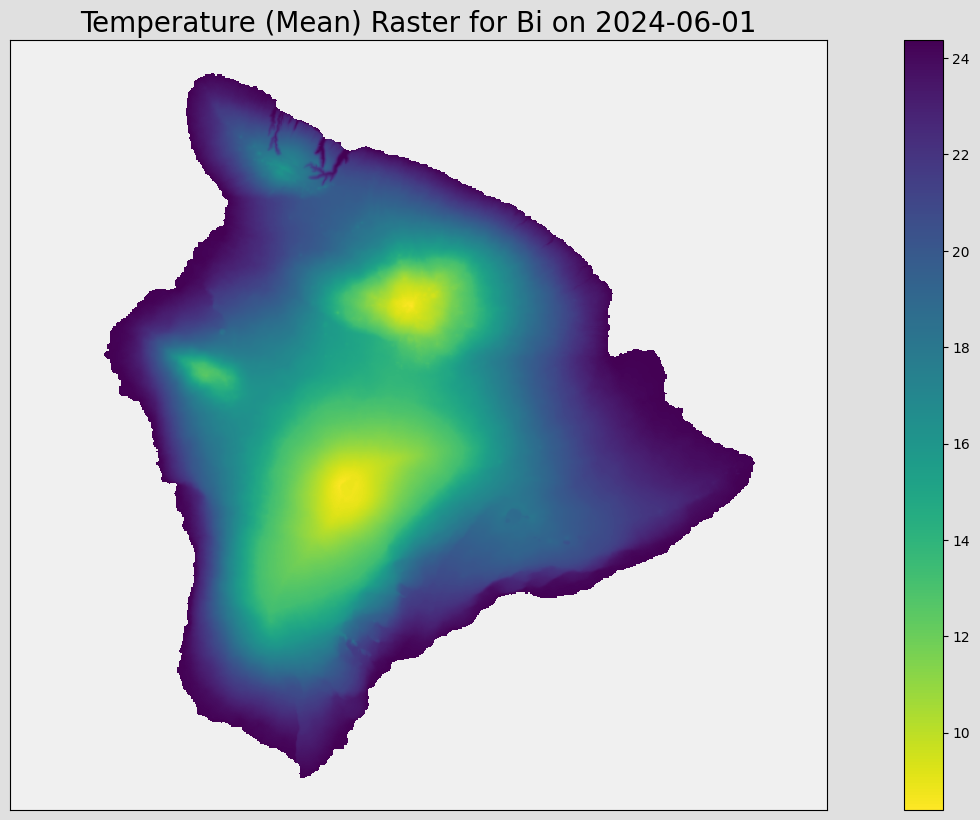

In [13]:
r = await prompt_process_agent.run("Display the temperature raster for Big Island in the month of June 1, 2024.")

In [14]:
@prompt_process_agent.tool_plain
def display_relative_humidity_raster(
    date: str,
    # aggregation: Aggregation = Aggregation.MEAN,
    extent: Extent = Extent.STATEWIDE
) -> None:
    """Display the relative humidity raster for the given date and extent."""
    params = {
        "datatype": "relative_humidity",
        # "aggregation": aggregation.value,  # Use `.value` if Production is an Enum
        "period": "day",
        "date": date,
        "extent": extent.value  # Use `.value` if Extent is an Enum
    }

    title = f"Relative Humidity Raster for {extent.value.title()} on {date}"
    display_raster(params, title)


Constructed API request URL: https://api.hcdp.ikewai.org/raster?datatype=relative_humidity&period=day&date=2024-06-01&extent=statewide
Constructed API request URL: https://api.hcdp.ikewai.org/raster?datatype=ndvi_modis&period=day&date=2020-06-01&extent=statewide


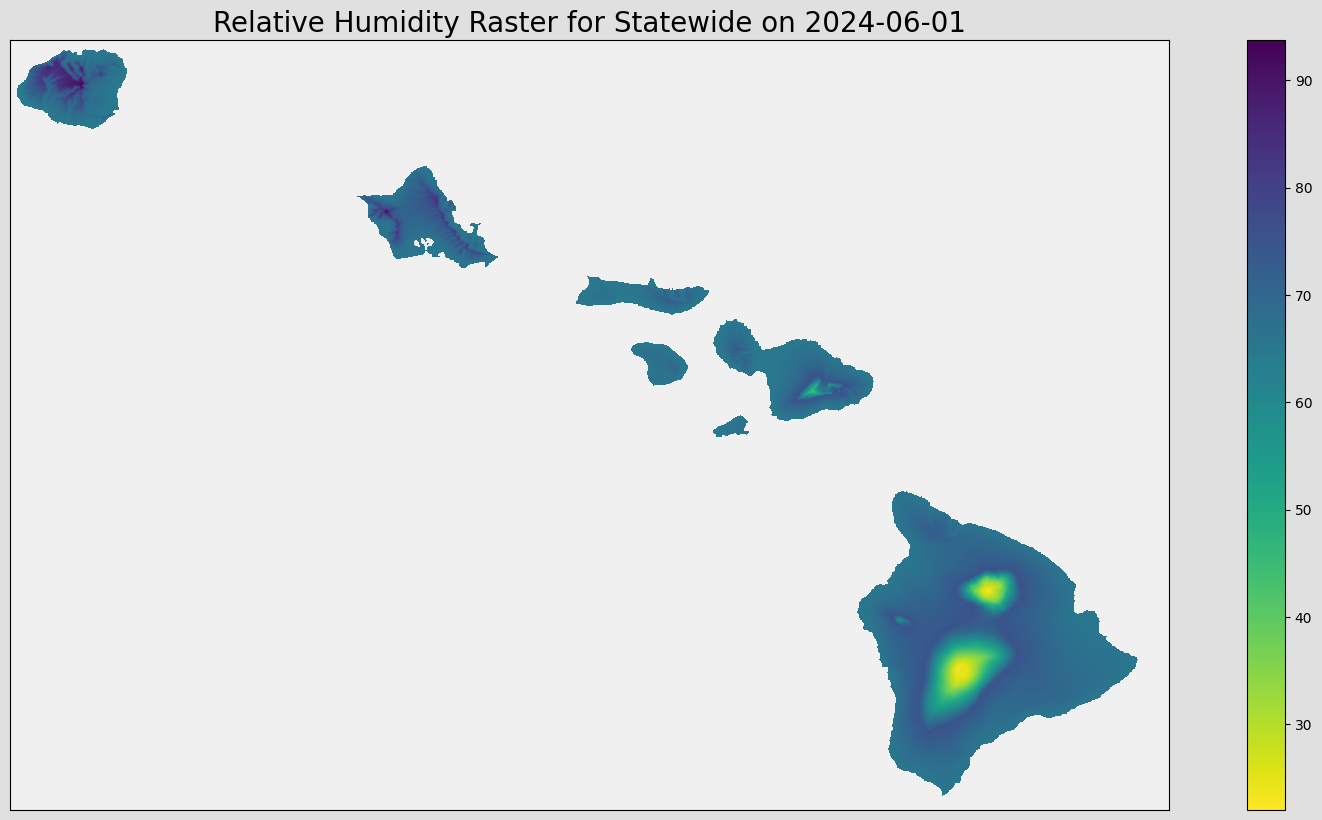

In [15]:
r = await prompt_process_agent.run("Display the relative humidity raster for the Hawaiian islands in the month of June 1, 2024.")

In [16]:
@prompt_process_agent.tool_plain
def display_vegetation_cover_raster(
    date: str,
    # aggregation: Aggregation = Aggregation.MEAN,
    extent: Extent = Extent.STATEWIDE
) -> None:
    """Display the vegetation cover NDVI raster for the given date and extent."""
    params = {
        "datatype": "ndvi_modis",
        # "aggregation": aggregation.value,  # Use `.value` if Production is an Enum
        "period": "day",
        "date": date,
        "extent": extent  # Use `.value` if Extent is an Enum
    }

    title = f"Normalized Difference Vegetation Index (NDVI) Raster for {extent.value.title()} on {date}"
    display_raster(params, title)


Constructed API request URL: https://api.hcdp.ikewai.org/raster?datatype=ndvi_modis&period=day&date=2020-06-01&extent=bi


/Users/williamharrigan/anaconda3/envs/clean_base/lib/python3.12/site-packages/matplotlib/colors.py:1355: RuntimeWarning: overflow encountered in divide
  resdat /= (vmax - vmin)


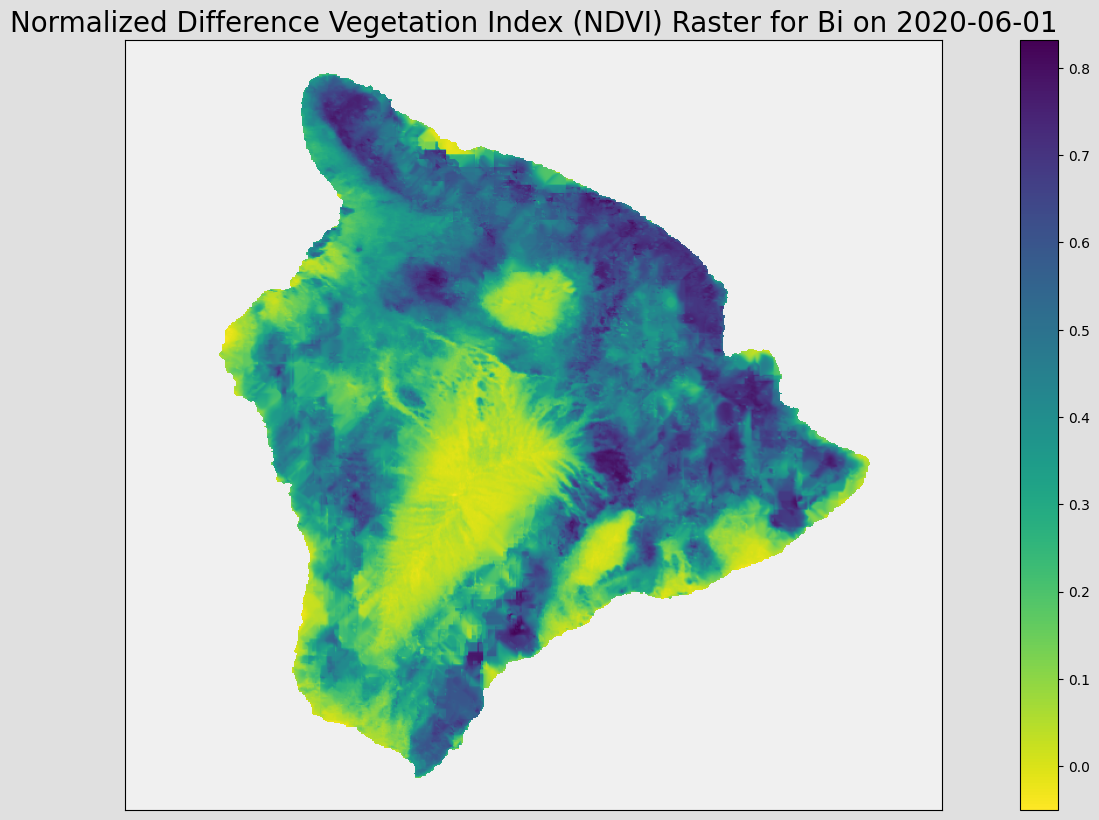

In [18]:
r = await prompt_process_agent.run("Display the veg cover raster for the Big island in the month of June 1, 2020.")

In [ ]:
requests.get('https://api.hcdp.ikewai.org/raster?datatype=ignition_probability&period=day&date=2025-04-01&extent=statewide', headers=header)

In [19]:
@prompt_process_agent.tool_plain
def display_ignition_probability_raster(
    date: str,
    # aggregation: Aggregation = Aggregation.MEAN,
    extent: Extent = Extent.STATEWIDE
) -> None:
    """Display the ignition probability raster for the given date and extent."""
    params = {
        "datatype": "ignition_probability",
        # "aggregation": aggregation.value,  # Use `.value` if Production is an Enum
        "period": "day",
        "date": date,
        "extent": extent  # Use `.value` if Extent is an Enum
    }

    title = f"Ignition Probability Raster for {extent.value.title()} on {date}"
    display_raster(params, title)


Constructed API request URL: https://api.hcdp.ikewai.org/raster?datatype=ignition_probability&period=day&date=2018-07-21&extent=mn


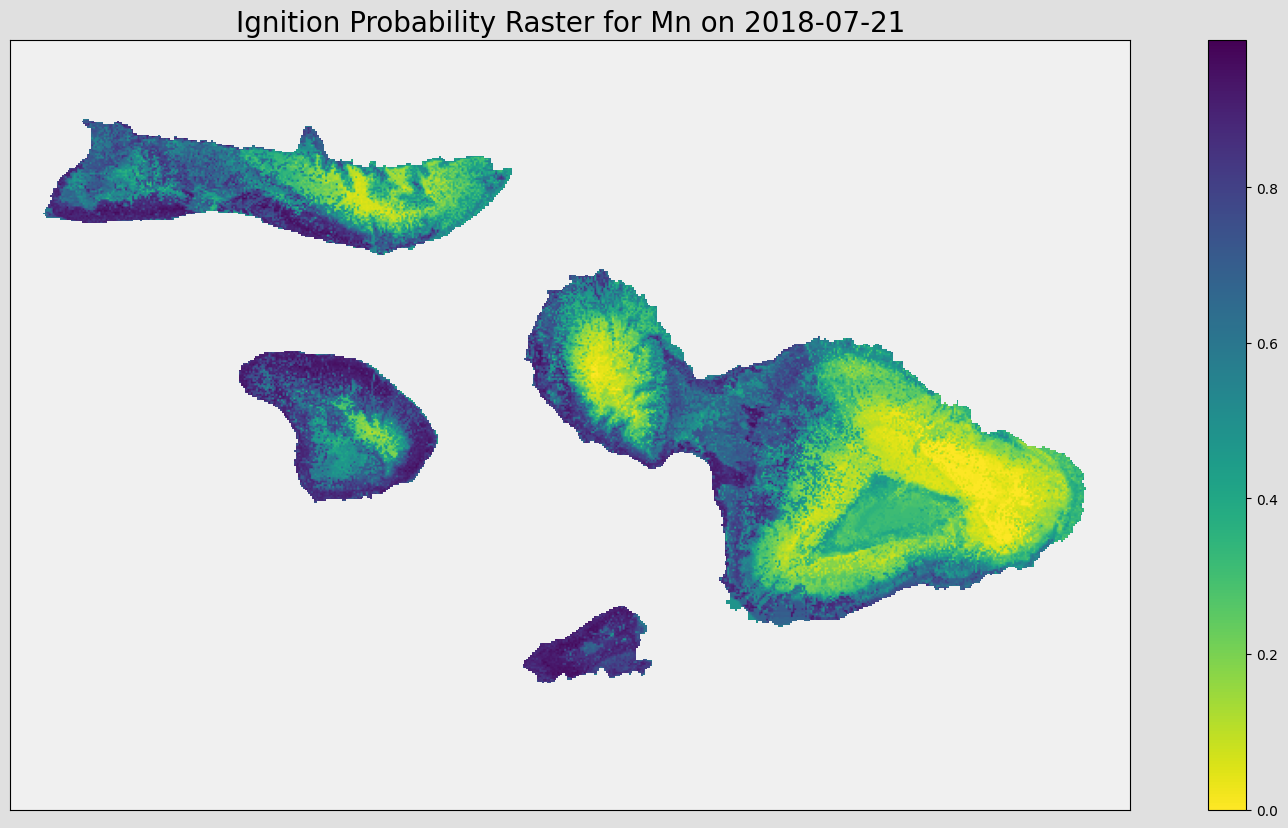

In [20]:
r = await prompt_process_agent.run("Display the ignition probability raster for the Molokai in the month of July 21, 2018.")